In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [2]:
df = pd.read_csv("water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [4]:
df['ph'].fillna(value = df['ph'].mean(), inplace = True)
df['Sulfate'].fillna(value = df['Sulfate'].mean(), inplace = True)
df['Trihalomethanes'].fillna(value = df['Trihalomethanes'].mean(), inplace = True)

In [5]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [6]:
#they are going to split the datasets into features and labels

#we want to put it is as a numpy array
X = df[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity',
        'Organic_carbon', 'Trihalomethanes','Turbidity']].to_numpy()

#we don't change this to a numpy array for importing this into tensor
Y = df[['Potability']].to_numpy()

#now lets get the shape
t1 = Y.shape[0]

#then not sure what this is but we are reshaping this to meet some tesnroflow requirement
Y = np.reshape(Y,(t1,))


#then split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.05)

In [7]:
#now make the KNNeighbor classifier
knn = KNeighborsClassifier()

#then fit
knn.fit(X_train, y_train)

#then print out prediction
print(knn.predict(X_test))

#and print the accuracy score
print(knn.score(X_test, y_test))

[0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0
 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0]
0.5975609756097561


In [8]:
#make the dimension
dim = X_train.shape[1]

#now we want to make a new y_train data
y_train2 = tf.keras.utils.to_categorical(y_train)

#not sure what this is (but it looks like what the output is)
category = 2

#now we are going to do the same with y_test
y_test2 = tf.keras.utils.to_categorical(y_test, num_classes = (category))

In [9]:
#now make the model 
model = tf.keras.models.Sequential()

#make the layers
model.add(tf.keras.layers.Dense(units = 100, activation = tf.nn.relu, input_dim = dim))
model.add(tf.keras.layers.Dense(units = 100, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(units = category, activation = tf.nn.softmax))

#then compile the model
model.compile(optimizer = 'adam', loss = tf.keras.losses.categorical_crossentropy, metrics = ['accuracy'])

#and then fit the model
model.fit(X_train, y_train2, epochs = 20, batch_size = 64)

Epoch 1/20
49/49 [==============================] - 0s 884us/step - loss: 304.7057 - accuracy: 0.5270
Epoch 2/20
49/49 [==============================] - 0s 807us/step - loss: 60.3273 - accuracy: 0.5080
Epoch 3/20
49/49 [==============================] - 0s 1ms/step - loss: 38.3258 - accuracy: 0.5186
Epoch 4/20
49/49 [==============================] - 0s 861us/step - loss: 36.1175 - accuracy: 0.5161
Epoch 5/20
49/49 [==============================] - 0s 859us/step - loss: 28.3062 - accuracy: 0.5180
Epoch 6/20
49/49 [==============================] - 0s 1ms/step - loss: 60.9113 - accuracy: 0.5212
Epoch 7/20
49/49 [==============================] - 0s 909us/step - loss: 54.9784 - accuracy: 0.5161
Epoch 8/20
49/49 [==============================] - 0s 805us/step - loss: 46.3891 - accuracy: 0.5154
Epoch 9/20
49/49 [==============================] - 0s 865us/step - loss: 38.4288 - accuracy: 0.5199
Epoch 10/20
49/49 [==============================] - 0s 866us/step - loss: 30.2299 - accuracy:

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1000      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 11,302
Trainable params: 11,302
Non-trainable params: 0
_________________________________________________________________


In [11]:
score = model.evaluate(X_test, y_test2)
print("score:", score)

6/6 [==============================] - 0s 1ms/step - loss: 16.1377 - accuracy: 0.6098
score: [16.137678146362305, 0.6097561120986938]


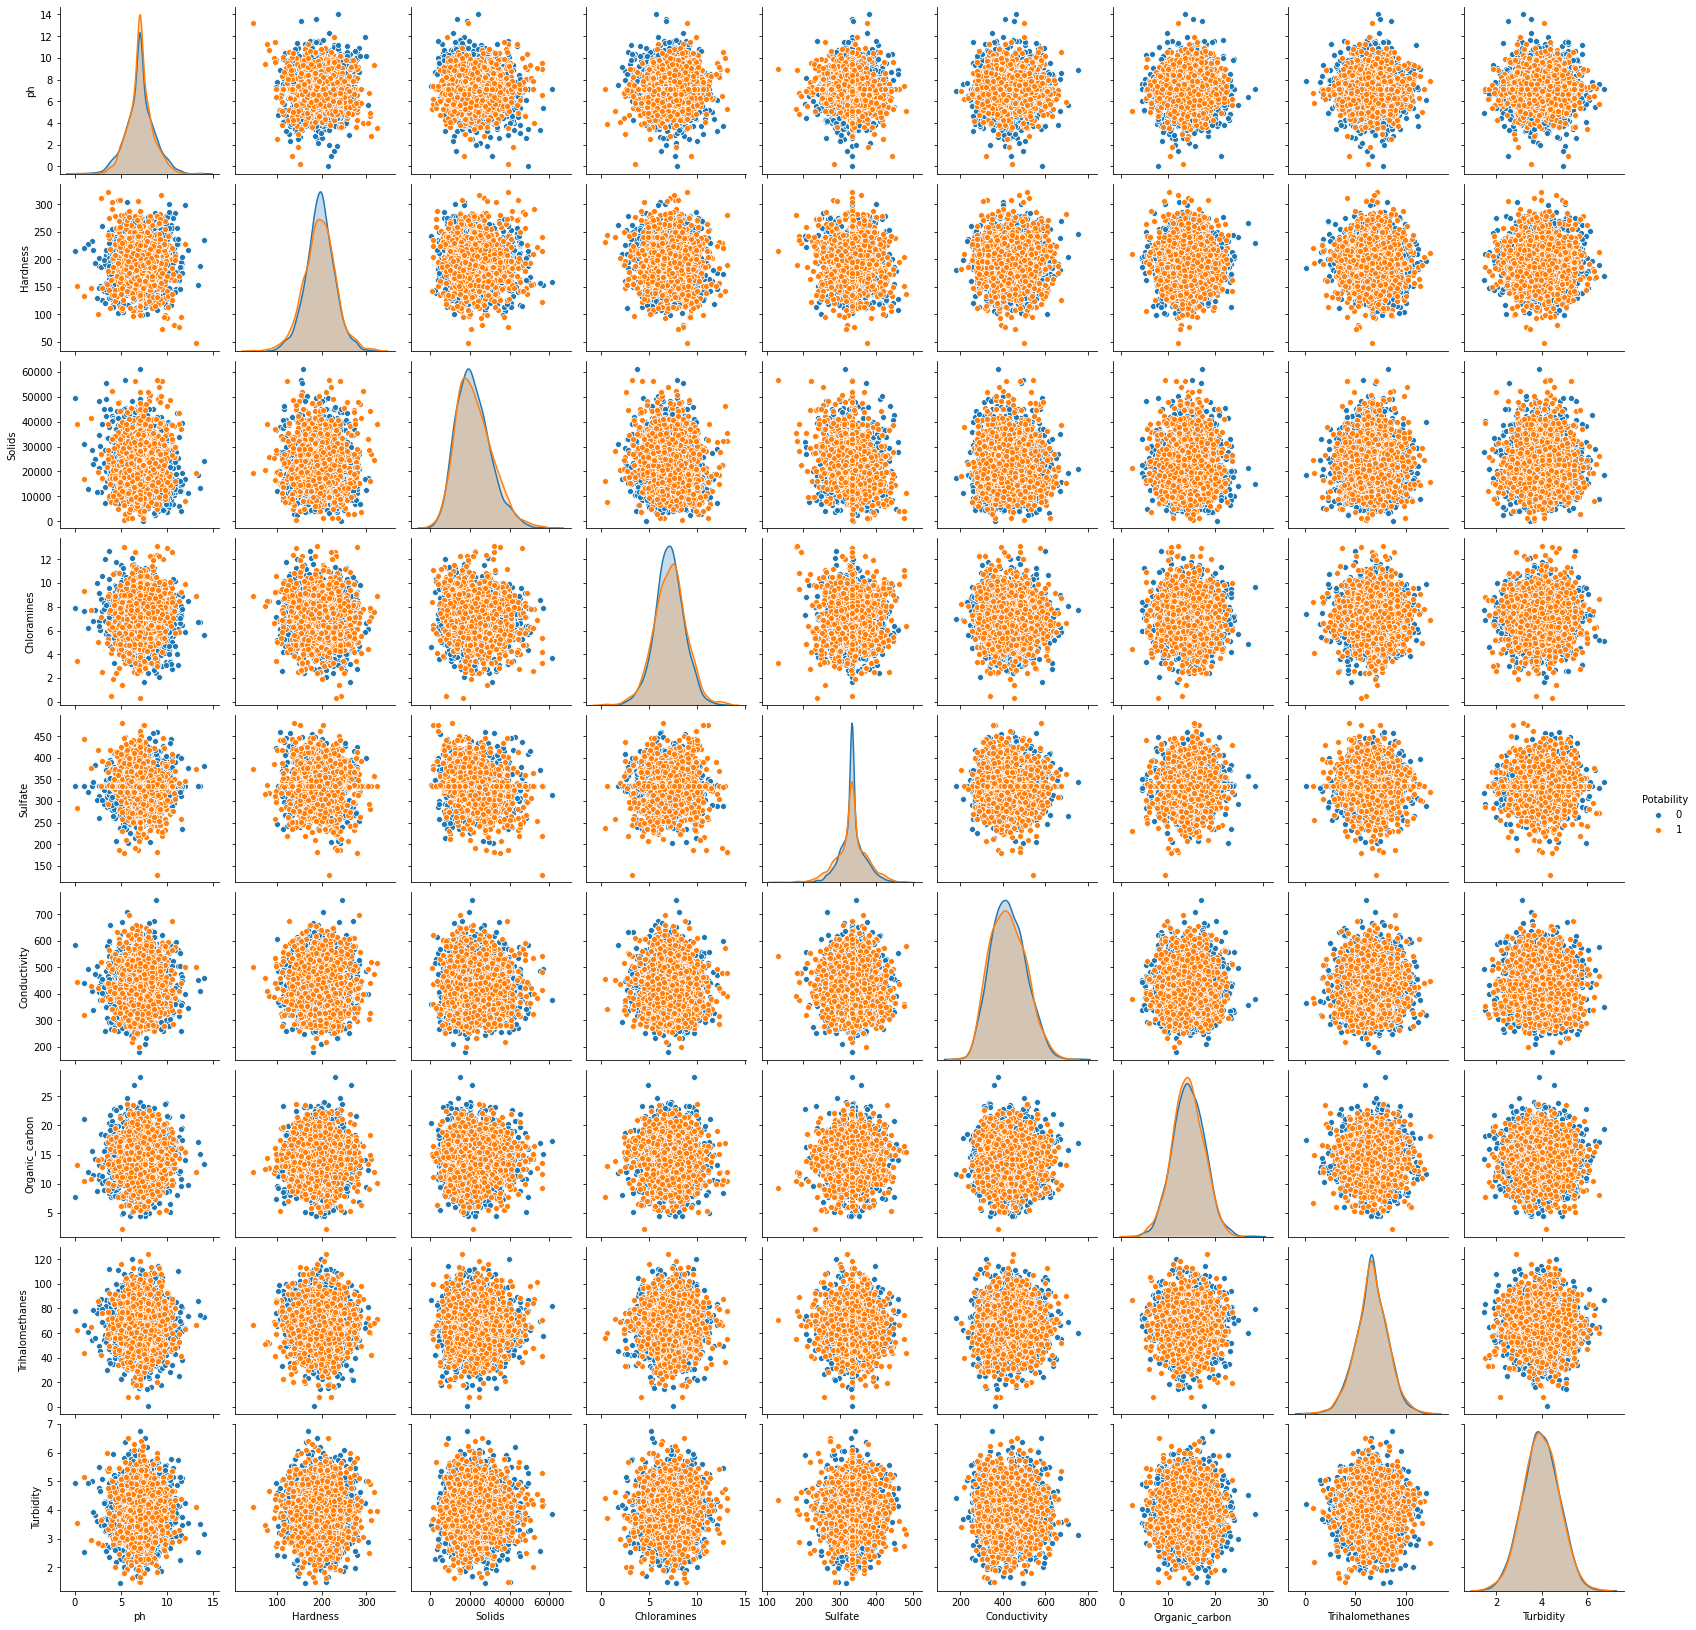

In [12]:
#then they made a pairplot
sns.pairplot(df, hue = 'Potability')